In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

from datetime import datetime
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

### Reading and Analyzing Datafiles

In [3]:
#Reading Training Data
train = pd.read_csv('../input/train_2016_v2.csv', parse_dates=["transactiondate"])
print ("Shape Of Train: ",train.shape)
train.head()

('Shape Of Train: ', (90275, 3))


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
#Reading Properties Data
prop = pd.read_csv("../input/properties_2016.csv")
print ("Shape Of Train: ",prop.shape)
prop.head()

('Shape Of Train: ', (2985217, 58))


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
#Merging both files to create the train file
train = pd.merge(train, prop, on='parcelid', how='left')
print ("Shape Of Train: ",train.shape)
train.head()

('Shape Of Train: ', (90275, 60))


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [6]:
#Checking data type of Variables
pd.options.display.max_rows = 65

dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


### Missing Values Analysis

In [7]:
#Checking the number of Nulls in this new merged dataset.
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train.shape[0]

# Printing Columns who's %age of NaN values is greater than 70%
missing_df.ix[missing_df['missing_ratio']>0.70]

#Dropping Columns who's %age of NaN values is greater than 70%
for col in list(train.columns.values):
    nanValues = float(train[col].isnull().sum()) / len(train)
    if nanValues > 0.70:
        #print col
        train = train.drop([col], axis=1)

### Correlation Analysis

                           Count     Column Type
0                       parcelid           int64
1                       logerror         float64
2                transactiondate  datetime64[ns]
3          airconditioningtypeid         float64
4                    bathroomcnt         float64
5                     bedroomcnt         float64
6          buildingqualitytypeid         float64
7              calculatedbathnbr         float64
8   calculatedfinishedsquarefeet         float64
9           finishedsquarefeet12         float64
10                          fips         float64
11                   fullbathcnt         float64
12                  garagecarcnt         float64
13               garagetotalsqft         float64
14         heatingorsystemtypeid         float64
15                      latitude         float64
16                     longitude         float64
17             lotsizesquarefeet         float64
18     propertycountylandusecode          object
19         propertyl

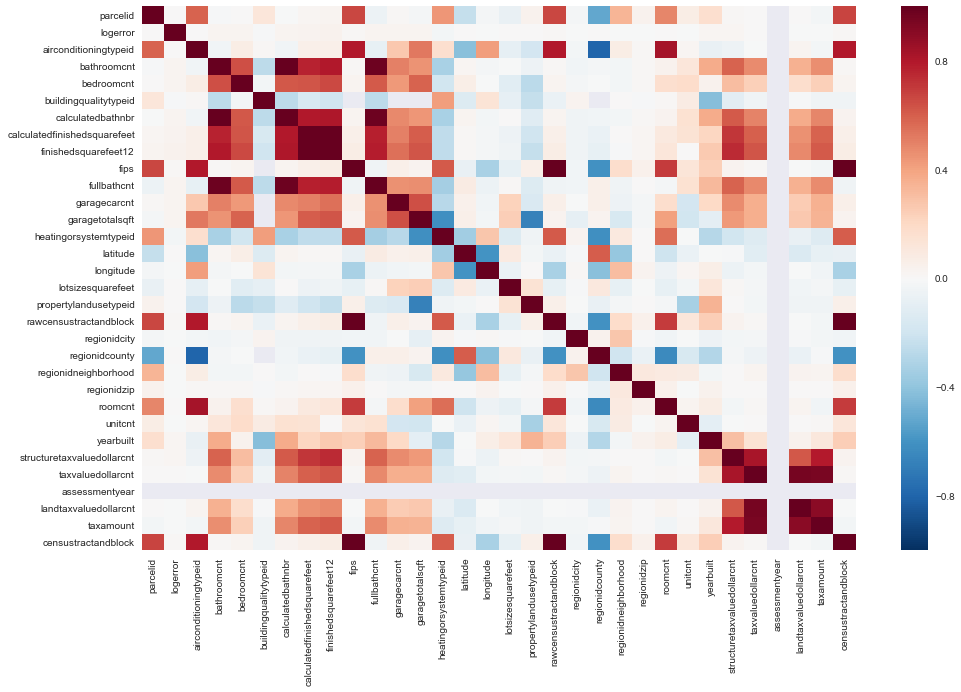

In [8]:
#Printing out all the Variables
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
print dtype_df

# Correlation Matrix
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), fmt="d")

In [9]:
'''
Out of the Highly corelated columns, the column with more NaN values are being dropped
 The following pairs are highly correlated
 bathroomcnt, calculatedbathnbr and fullbathcnt
 calculatedfinishedsquarefeet and finishedsquarefeet12    
 fips, rawcensustractandblock, censustrackandblock
 taxvaluedollarcnt, taxamount, landvaluedollarcnt
'''

for col in ('calculatedbathnbr','fullbathcnt','finishedsquarefeet12','rawcensustractandblock','censustractandblock','landtaxvaluedollarcnt','taxvaluedollarcnt'):
    train = train.drop([col], axis=1)

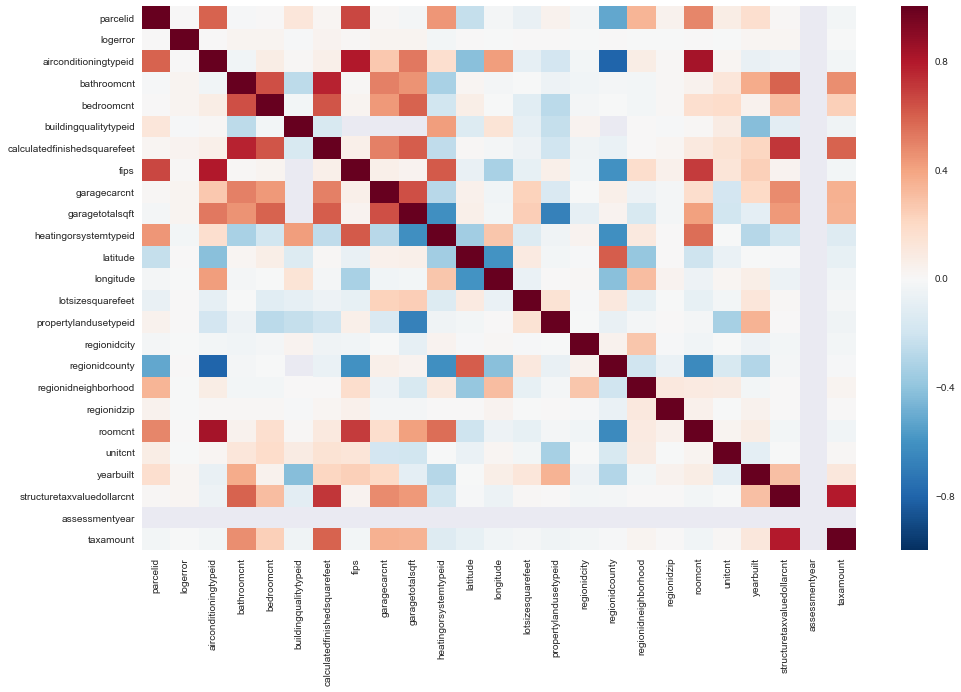

In [10]:
# Correlation Matrix after dropping highly corelated columns
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), fmt="d")

### Univariate Analysis

Dividing Data into 3 types and exploring the variables: 

a. continuous = [ 'taxamount','garagetotalsqft', 'calculatedfinishedsquarefeet',
               'lotsizesquarefeet','structuretaxvaluedollarcnt']
The continuous variables are depicted through displot, 

Not Considered : 'latitude', 'longitude'             
               
b. discrete = ['bathroomcnt', 'bedroomcnt','garagecarcnt', 'roomcnt', 'unitcnt', 'yearbuilt']
The discrete variables are depicted through countplot

Not Considered : 'assessmentyear'
            
c. categorical = ['airconditioningtypeid', 'buildingqualitytypeid',   'heatingorsystemtypeid',
               'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'fips',
               'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip']   
The categorical variables are depicted through barplot       

Not Considered : 'propertycountylandusecode', 'propertyzoningdesc', 'regionidcity', 'regionidneighborhood', 'regionidzip'

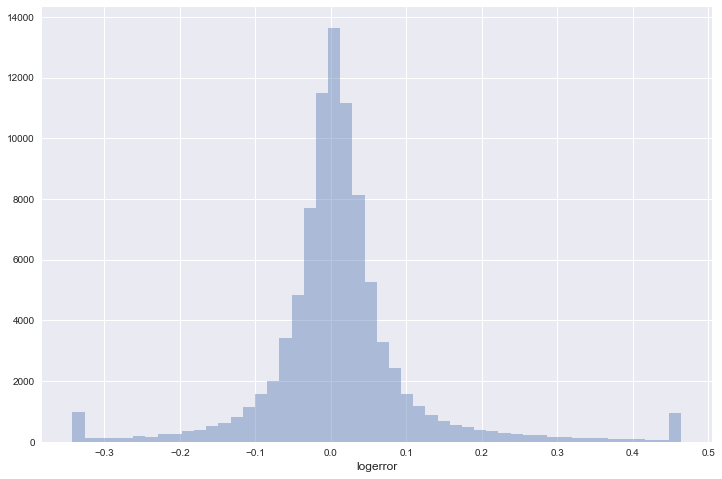

In [11]:
#Histogram plot after removing outliers:
ulimit = np.percentile(train.logerror.values, 99)
llimit = np.percentile(train.logerror.values, 1)
train['logerror'].ix[train['logerror']>ulimit] = ulimit
train['logerror'].ix[train['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

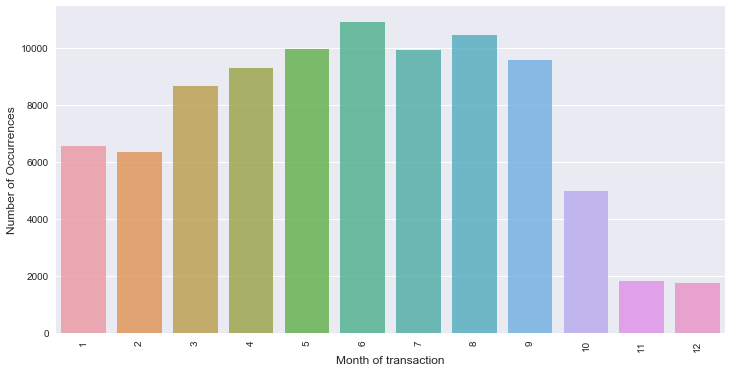

In [12]:
#Transaction Date:

#Exploring number of transactions in each month.
train['transaction_month'] = train['transactiondate'].dt.month
cnt_srs = train['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()


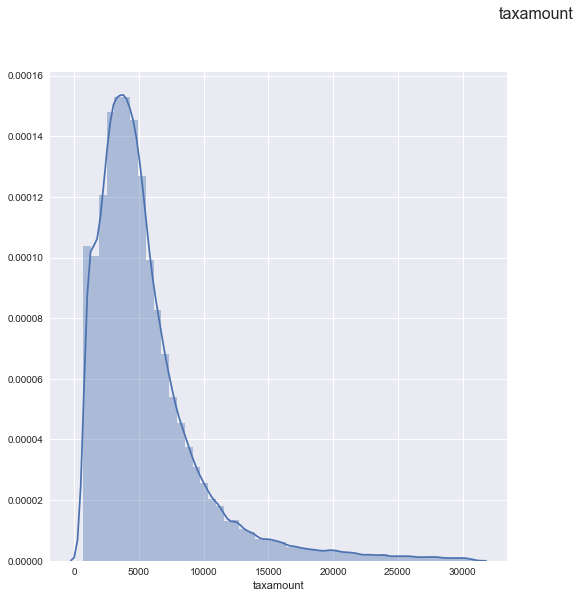

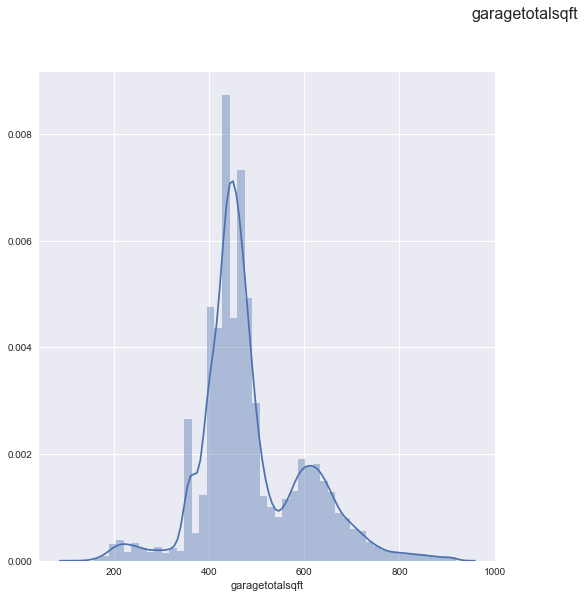

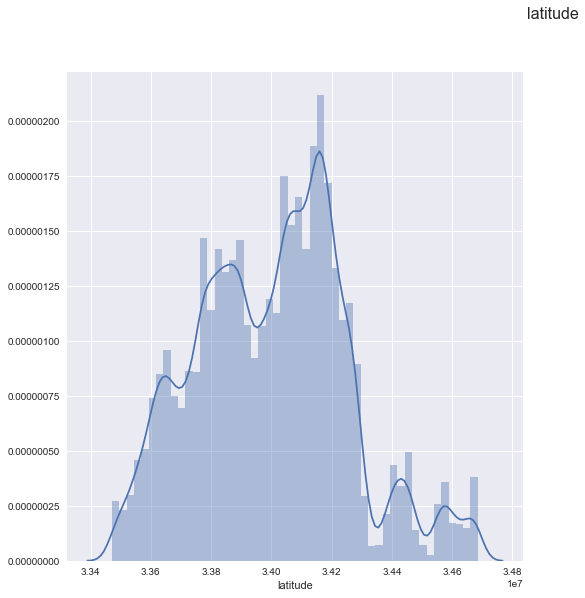

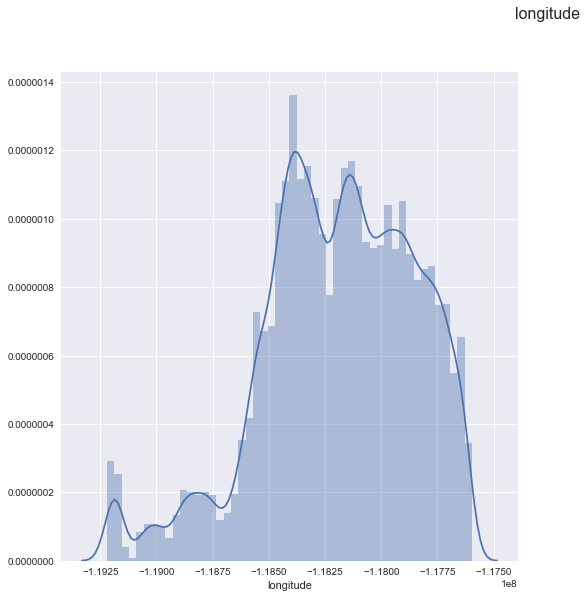

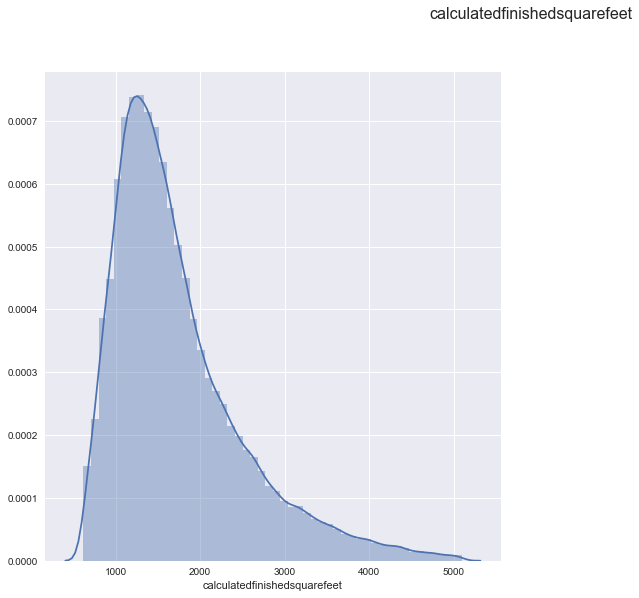

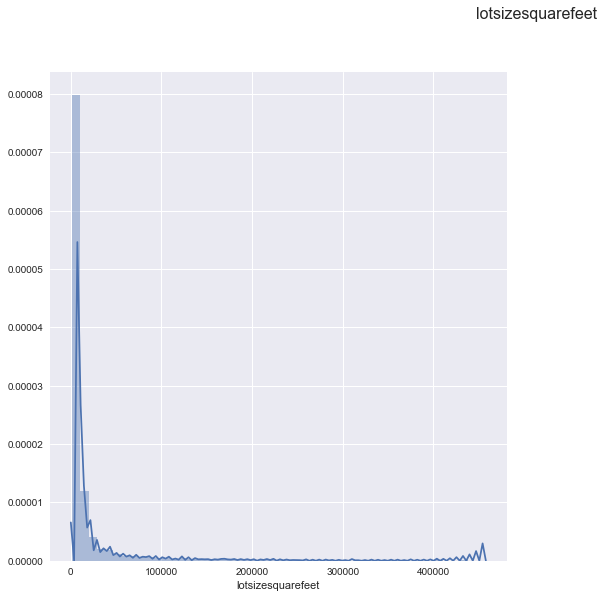

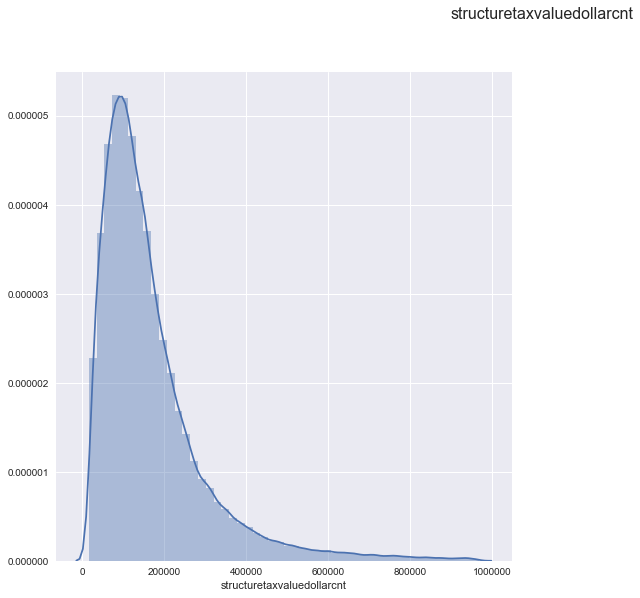

In [13]:
#Continuous Variables
continuous = [ 'taxamount','garagetotalsqft', 'latitude', 'longitude','calculatedfinishedsquarefeet', 'lotsizesquarefeet','structuretaxvaluedollarcnt']

### Continuous variable plots
for col in continuous:
    values = train[col].dropna()
    lower = np.percentile(values, 1)
    upper = np.percentile(values, 99)
    fig = plt.figure(figsize=(18,9));
    sns.distplot(values[(values>lower) & (values<upper)], ax = plt.subplot(121));
    plt.suptitle(col, fontsize=16)      

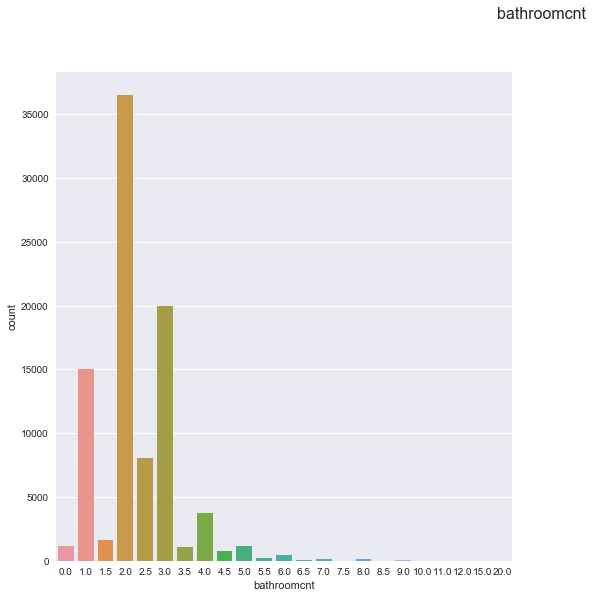

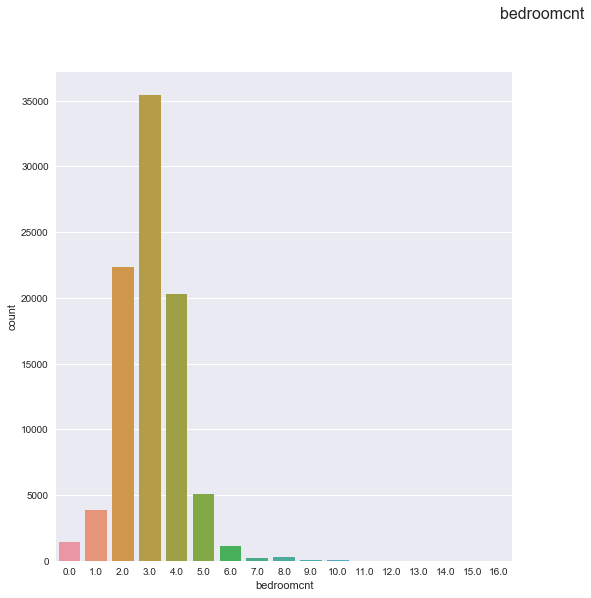

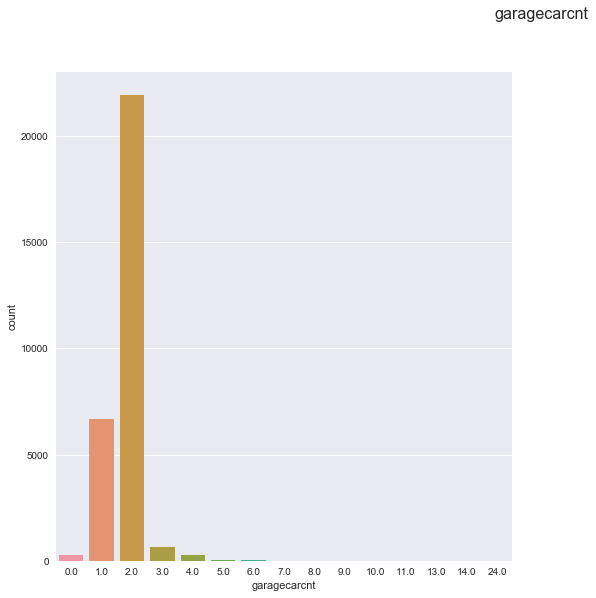

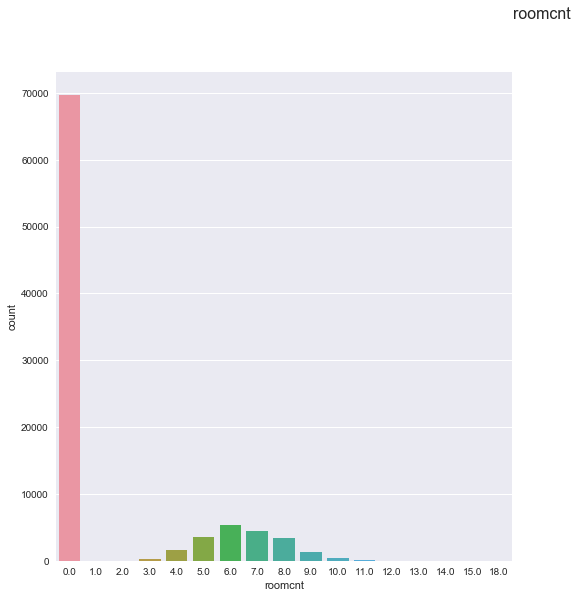

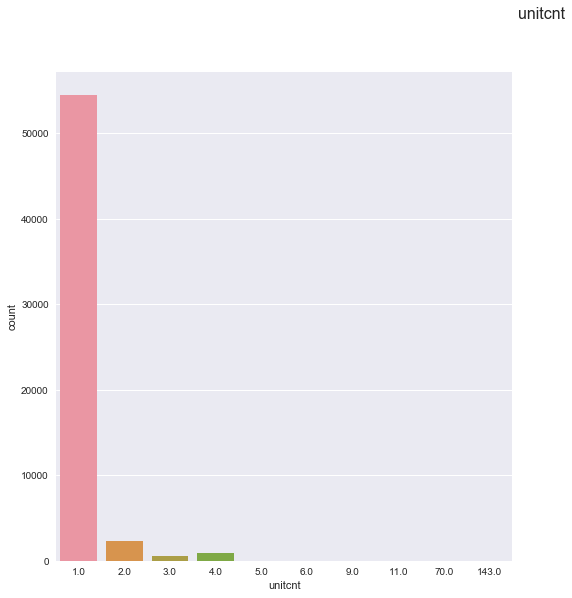

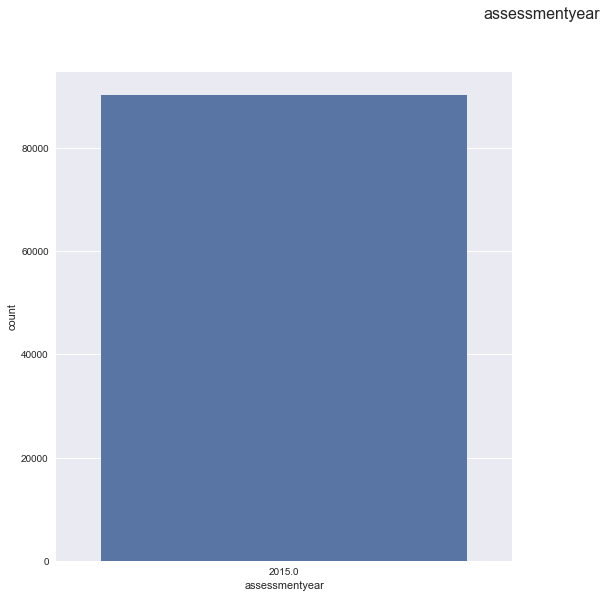

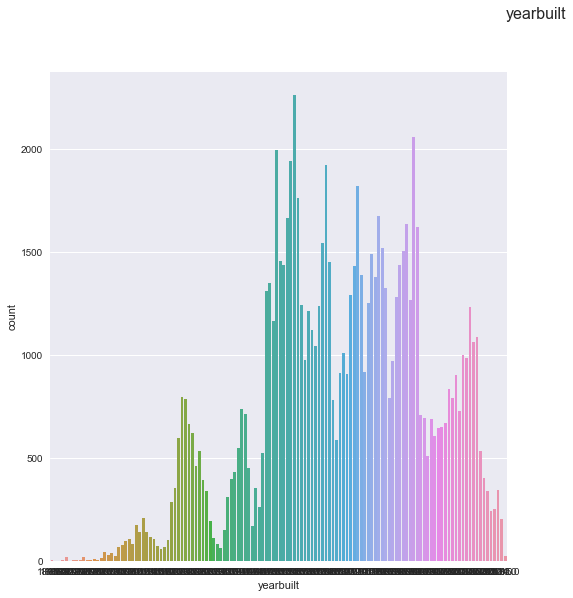

In [14]:
#Discrete Variables
discrete = ['bathroomcnt', 'bedroomcnt','garagecarcnt', 'roomcnt', 'unitcnt','assessmentyear', 'yearbuilt']

### Discrete variable plots
for col in discrete:
    values = train[col].dropna()   
    fig = plt.figure(figsize=(18,9));
    sns.countplot(x=values, ax = plt.subplot(121));
    plt.suptitle(col, fontsize=16)

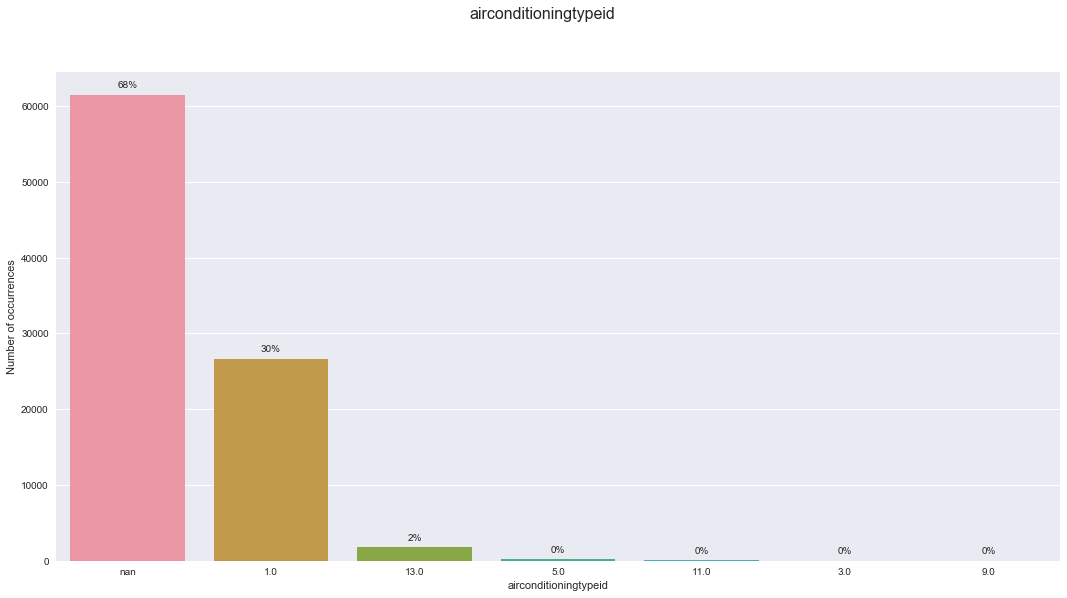

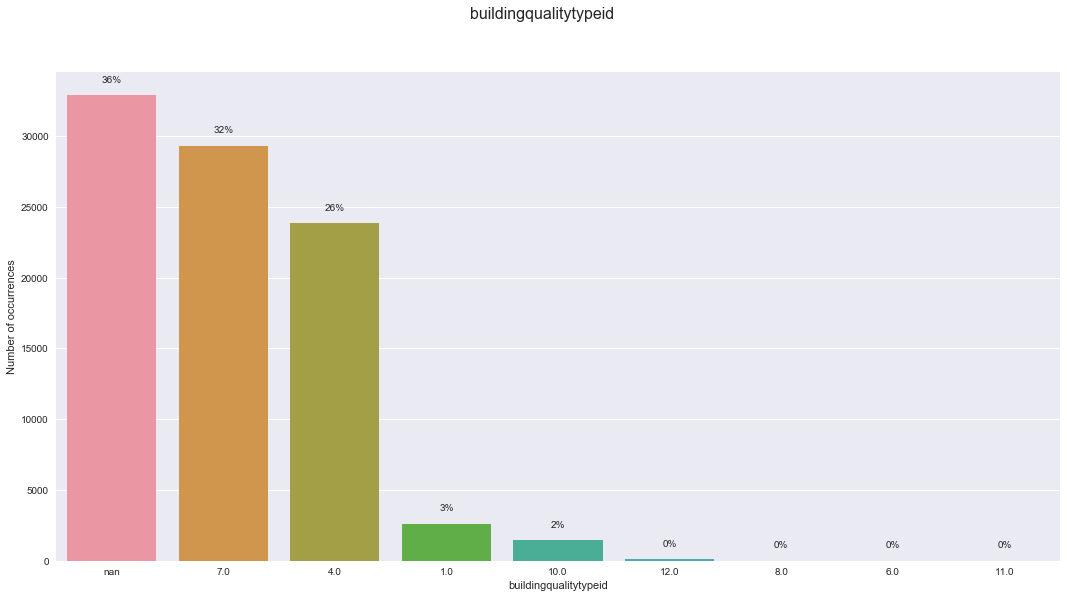

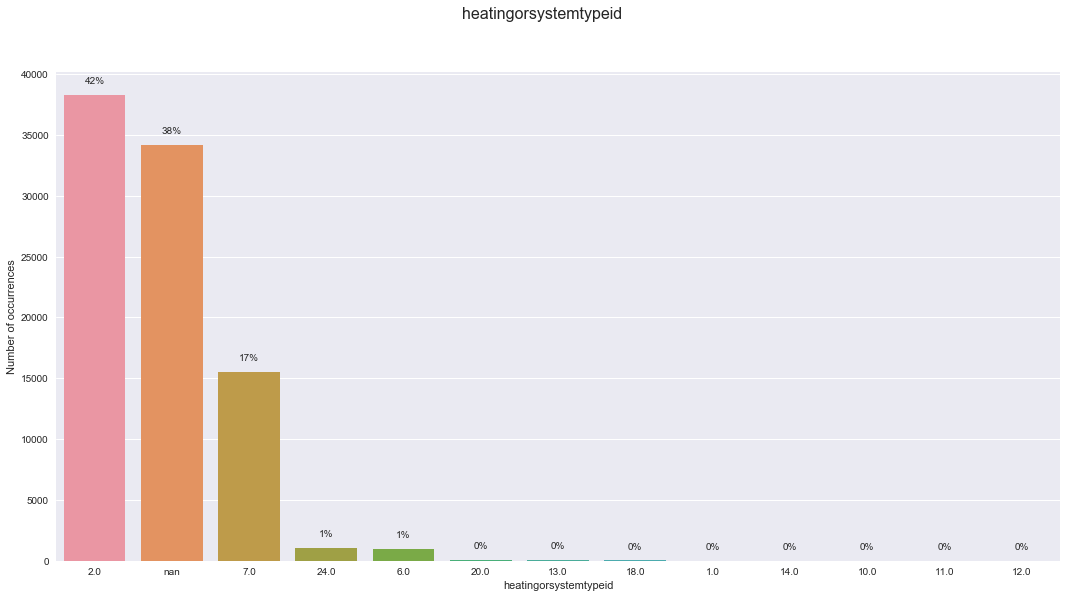

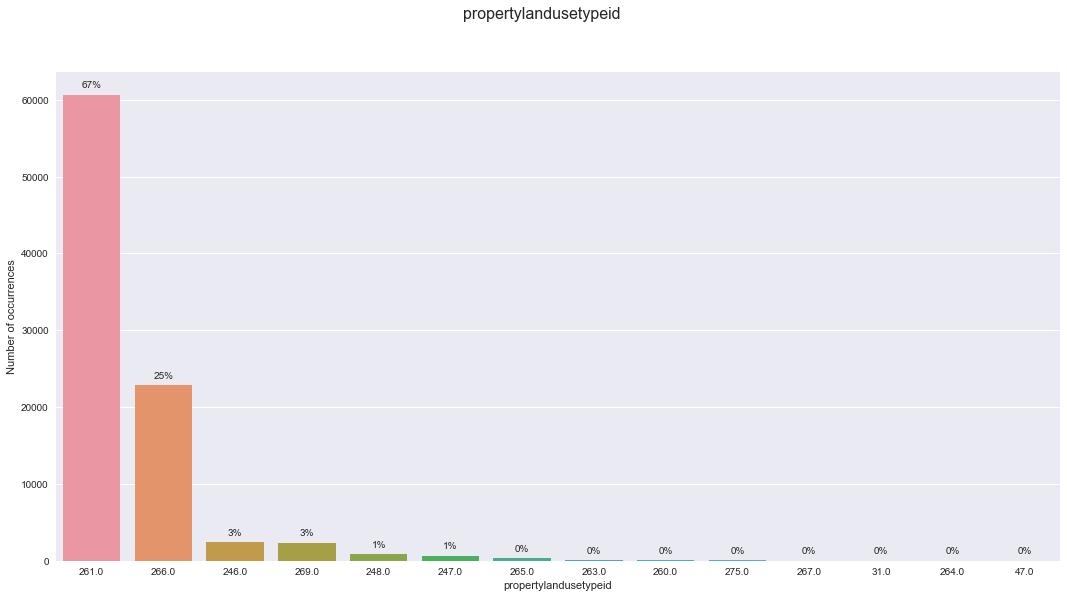

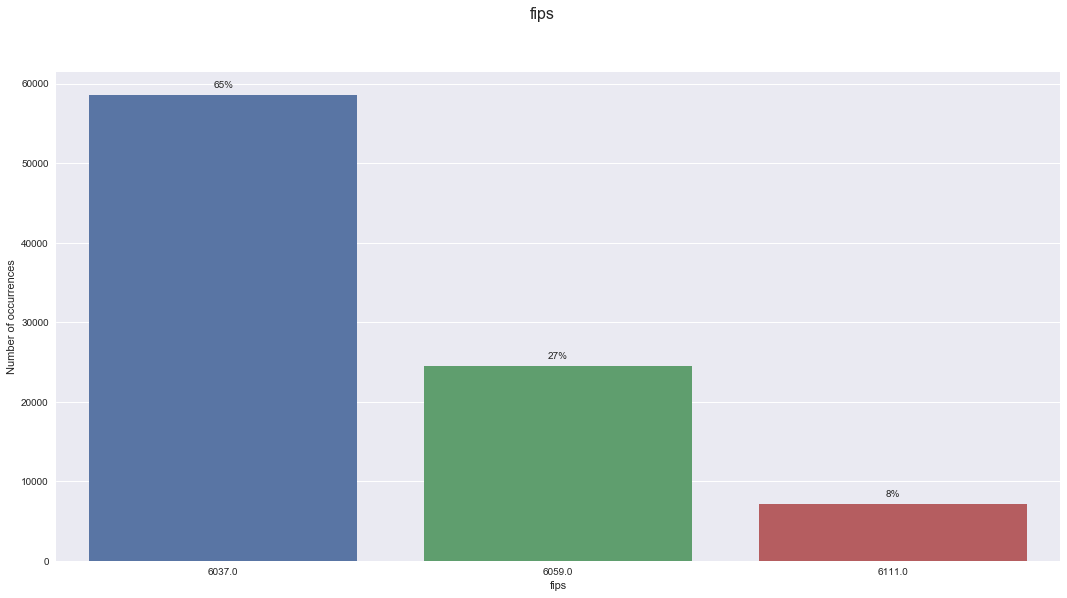

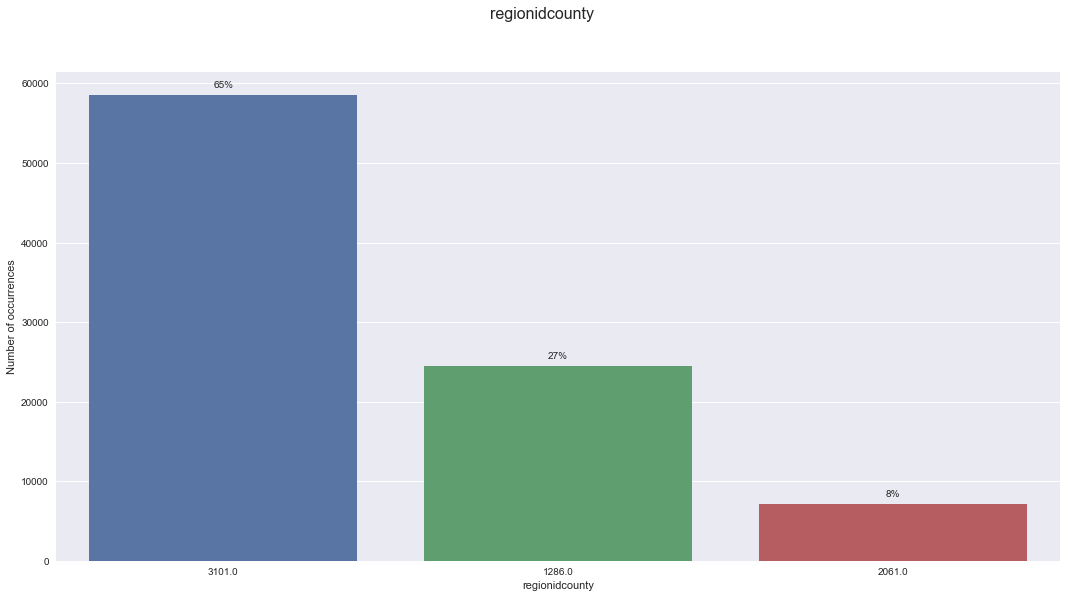

In [15]:
#Categorical Variables
categorical = ['airconditioningtypeid', 'buildingqualitytypeid', 'heatingorsystemtypeid',
               'propertylandusetypeid', 'fips', 'regionidcounty']

### Categorical variable plots
for col in categorical:
    values = train[col].astype('str').value_counts(dropna=False).to_frame().reset_index()
    values.columns = [col, 'counts']
    fig = plt.figure(figsize=(18,9))
    ax = sns.barplot(x=col, y='counts', data=values, order=values[col]);
    plt.xlabel(col);
    plt.ylabel('Number of occurrences')
    plt.suptitle(col, fontsize=16)

    ### Adding percents over bars
    height = [p.get_height() for p in ax.patches]    
    total = sum(height)
    for i, p in enumerate(ax.patches):    
        ax.text(p.get_x()+p.get_width()/2,
                height[i]+total*0.01,
                '{:1.0%}'.format(height[i]/total),
                ha="center")    

### Bivariate Analysis

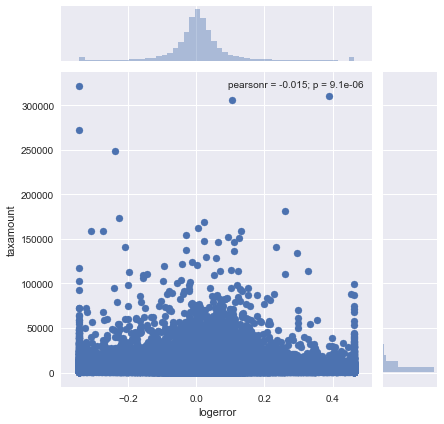

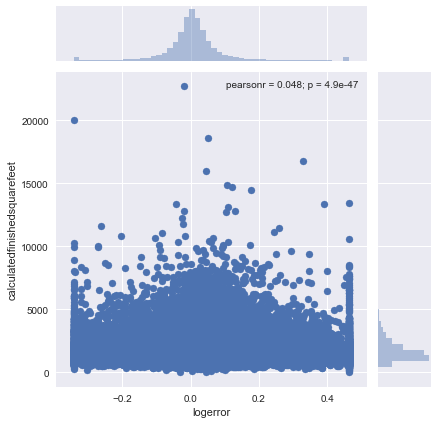

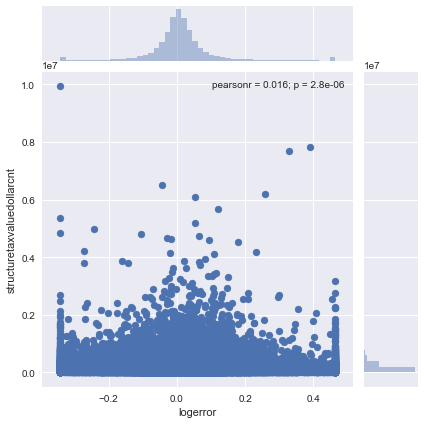

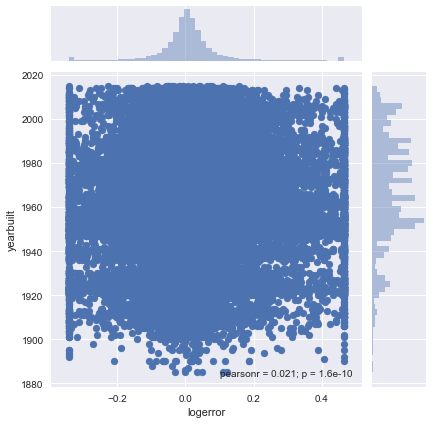

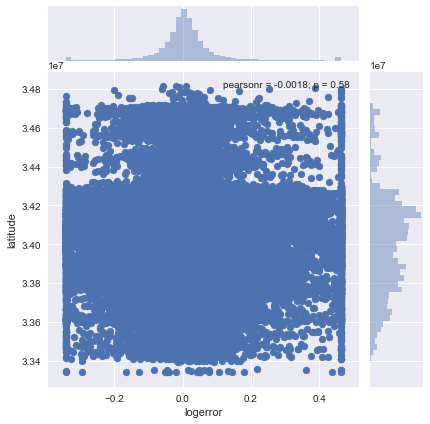

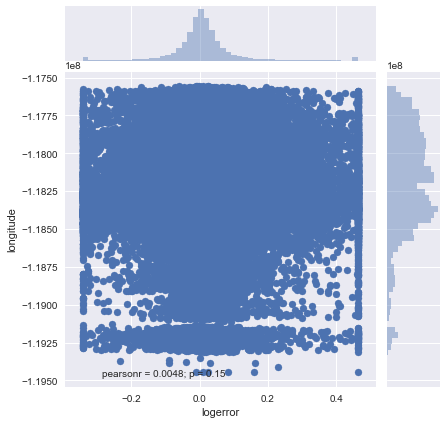

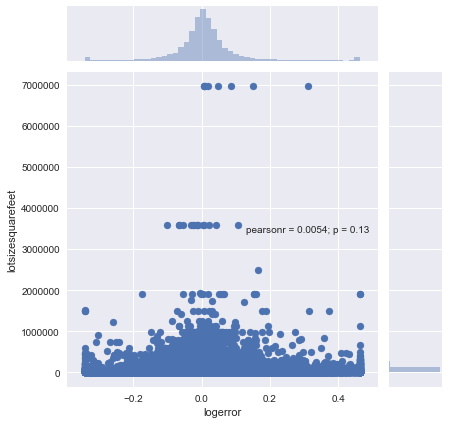

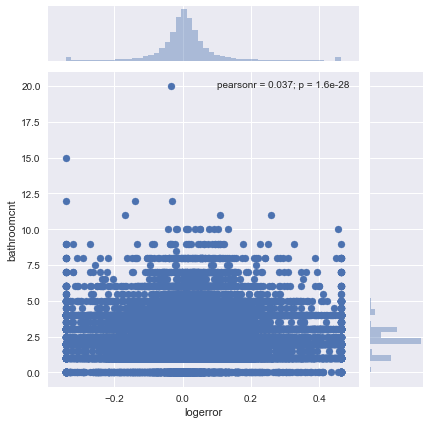

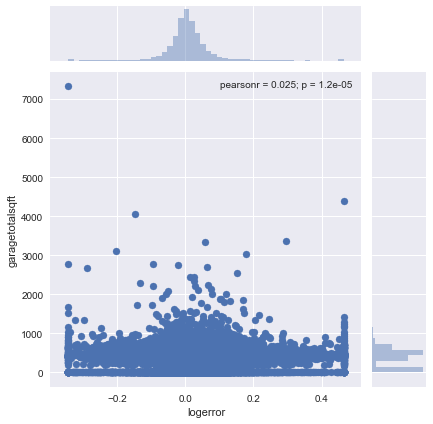

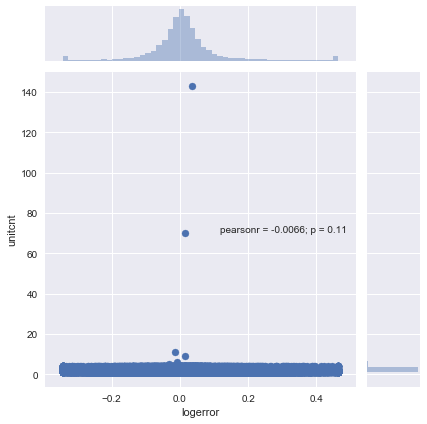

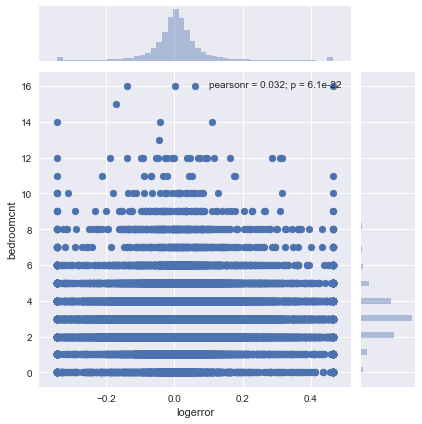

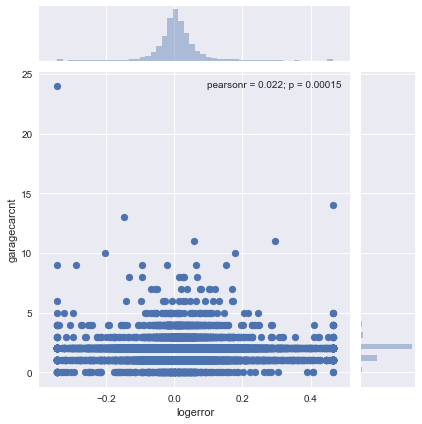

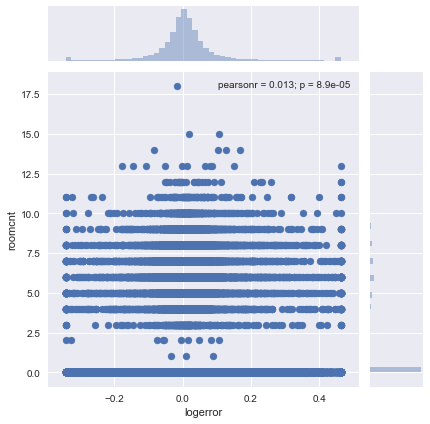

In [52]:
#Variables
variables = ['taxamount','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt',
                'yearbuilt','latitude','longitude',
                'lotsizesquarefeet',
                'bathroomcnt','garagetotalsqft',
                'unitcnt',
                'bedroomcnt','garagecarcnt','roomcnt']
                
for val in variables:
    values = train[val].dropna()   
    fig = plt.figure(figsize=(18,9));
    g= sns.jointplot(x=train.logerror,y=values)